In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fminbound
from scipy.interpolate import interp1d

In [2]:
# Defining Maximize Function and its maximizer on interval [a, b]
def maximum(V, a, b):
    return float(V(fminbound(lambda x: -V(x), a, b)))

def maximizer(V, a, b):
    return float(fminbound(lambda x: -V(x), a, b))

In [6]:
# Assigning Parameter
A = 1; α = 0.33; β = 0.95

# Defining Basic Functions
def u(c):
    return np.log(c)

def f(K, A = A, α = α):
    return A * (K ** α)

def r(K):
    return A * α * (K ** (α-1))

def K_ss(A = A, α = α, β = β):
    return (A * α * β) ** (1 / (1-α))

# Defining the Time Sequence
t_min = 1; t_max = 50; t_size = 50
time = np.linspace(t_min, t_max, t_size)

In [22]:
# Guessing K's sequence: K_s

dK = (K_ss(A = 1.5) - K_ss(A = 1)) / 20
K_s = np.zeros(t_max)

for i in range(t_max):
    if i < 19:
        K_s[i] = float(K_ss(A = 1))
        
    if i == 19:
        K0 = K_ss(A=1) + dK
        K_s[i] = float(K0)
        
    if 19 < i < 39 :
        K1 = K0 + dK
        K_s[i] = float(K1)
        K0 = K1
        
    if i >= 39 :
        K_s[i] = float(K_ss(A = 1.5))

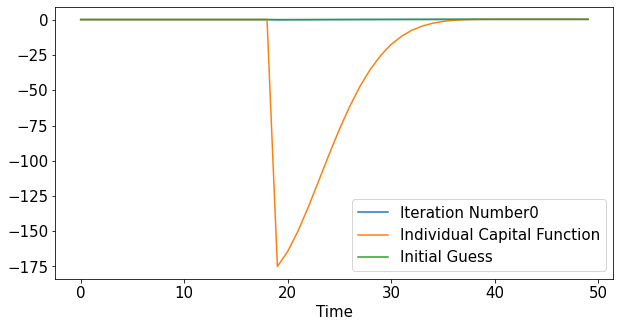

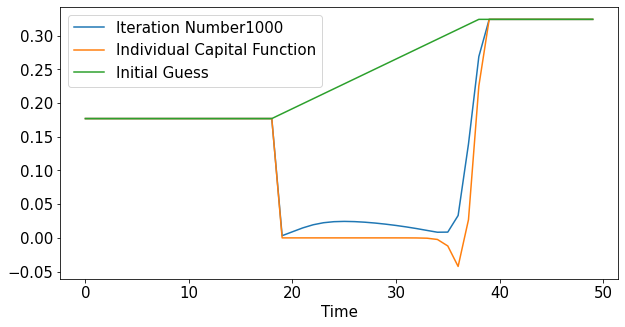

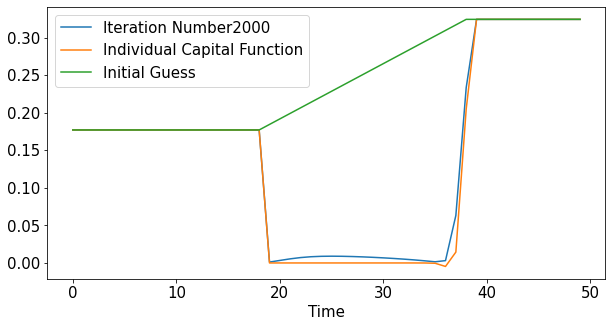

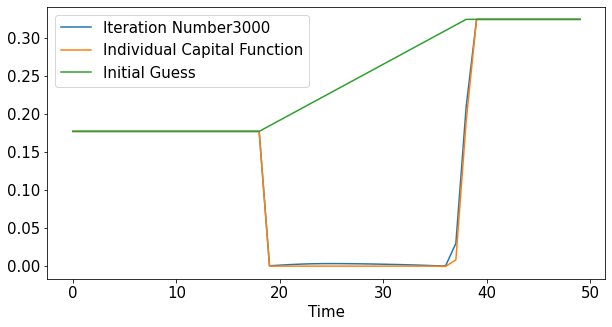

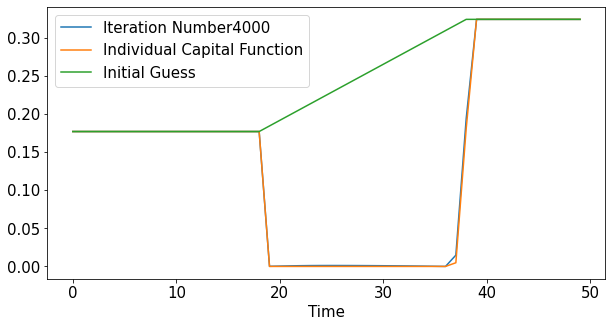

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


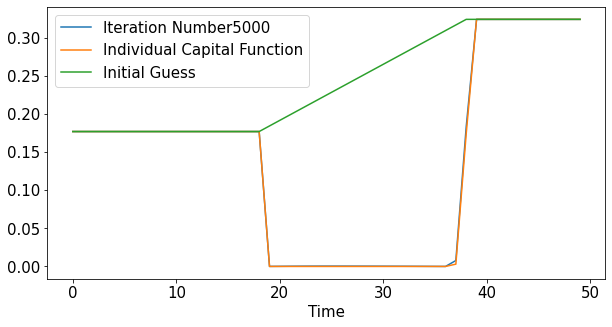

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


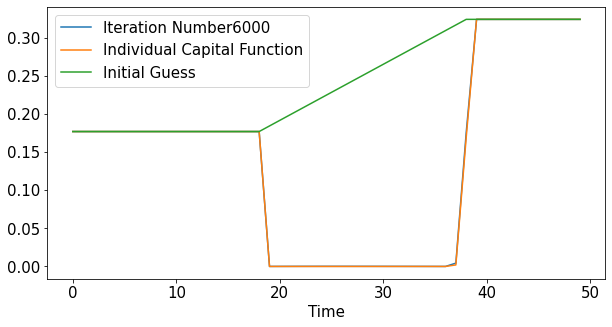

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


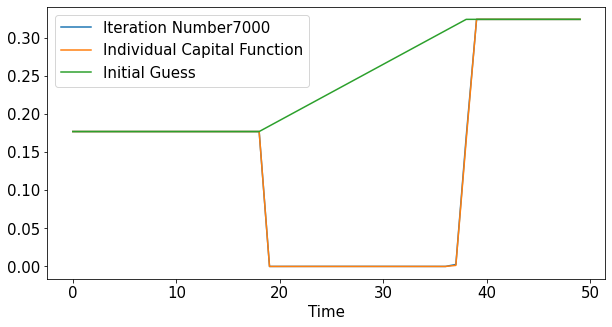

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


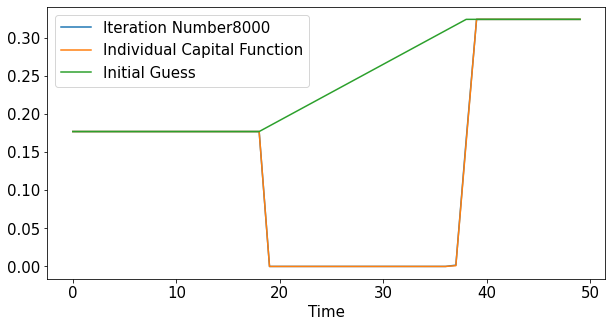

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


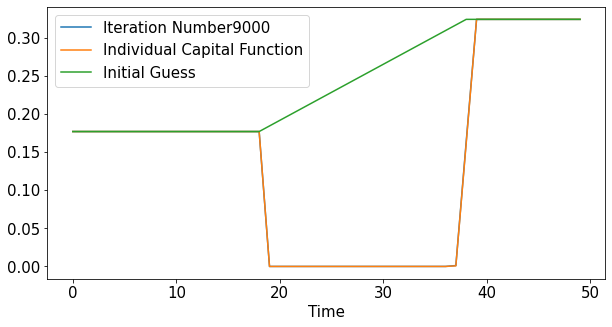

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


In [23]:
'''
Rule 1

a = 0.999*Λ1(time) + 0.001*g(time)

'''

# Initial Guess for K sequence

dK = (K_ss(A = 1.5) - K_ss(A = 1)) / 20
K_s = np.zeros(t_max)

for i in range(t_max):
    if i < 19:
        K_s[i] = float(K_ss(A = 1))
        
    if i == 19:
        K0 = K_ss(A=1) + dK
        K_s[i] = float(K0)
        
    if 19 < i < 39 :
        K1 = K0 + dK
        K_s[i] = float(K1)
        K0 = K1
        
    if i >= 39 :
        K_s[i] = float(K_ss(A = 1.5))
        
Λ = interp1d(time, K_s)

count = 0
max_iter = 10000
tol = 1e-06

Λ1 = Λ

while count < max_iter:
    
    # Aggregate Capital Sequence
    K_s = Λ1(time) 
    K_s = K_s.clip(min = 0)
    
    # Capital Rental Price Sequence
    r_s = np.zeros(t_max)
    
    for i in range(t_max):
        r_s[i] = r(K_s[i])
    
    # Individual's capital sequence
    k_s = np.zeros(t_max)
    k_s[39:] = K_ss(A = 1.5)
    k_s[:19] = K_ss(A = 1)
    for i in range(20):
        k_s[38-i] = (1 / β) * (1 / r_s[38-i]) * ((1 + β) * k_s[38-i+1] - (1 / r_s[38-i+1]) * k_s[38-i+2])
    
    g = interp1d(time, k_s)
    
    a = 0.999 * Λ1(time) + 0.001 * g(time)
    
    Λ2 = interp1d(time, a)
    
    if int(count) % 1000 == 0:
        plt.figure(figsize = (10,5) )
        plt.plot(Λ2(time), label = 'Iteration Number' + str(count))
        plt.plot(g(time), label = 'Individual Capital Function')
        plt.plot(Λ(time), label = "Initial Guess")
        plt.legend(fontsize = 15)
        plt.xlabel('Time', fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
    
    Λ1 = Λ2
    count += 1

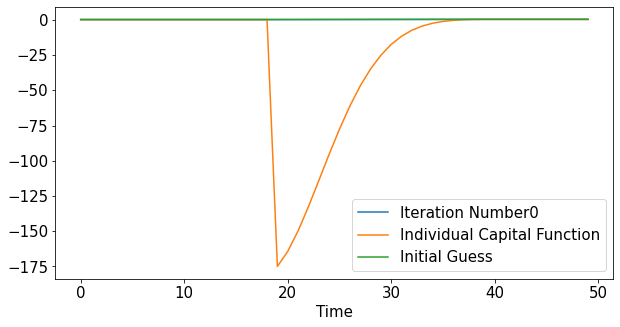

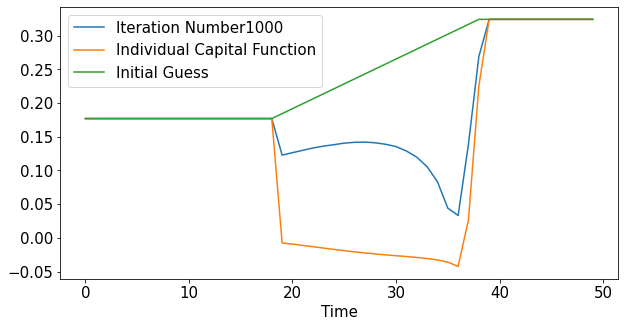

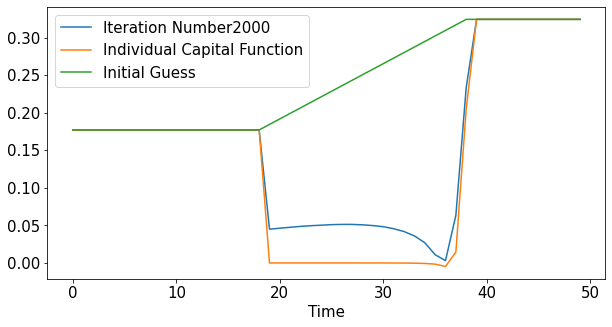

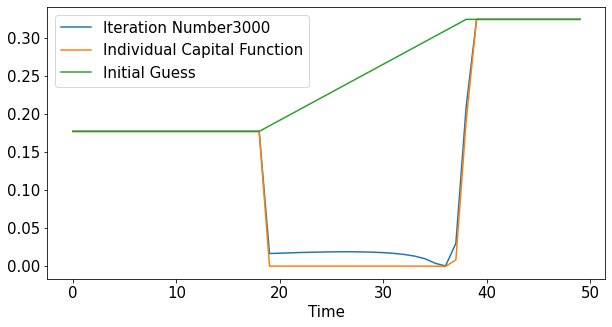

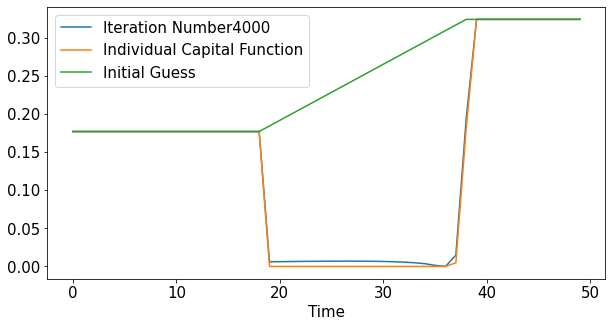

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


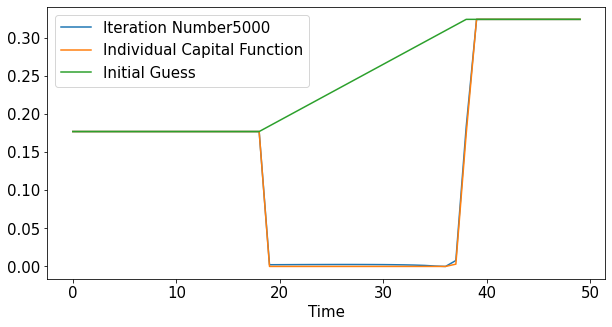

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


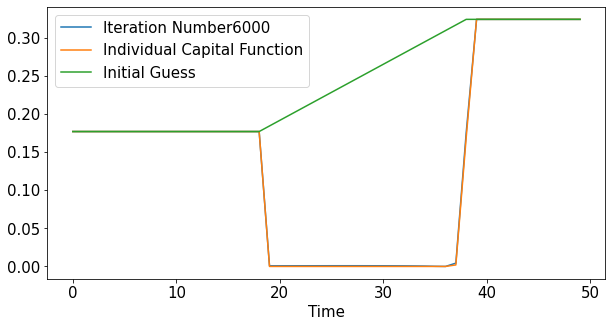

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


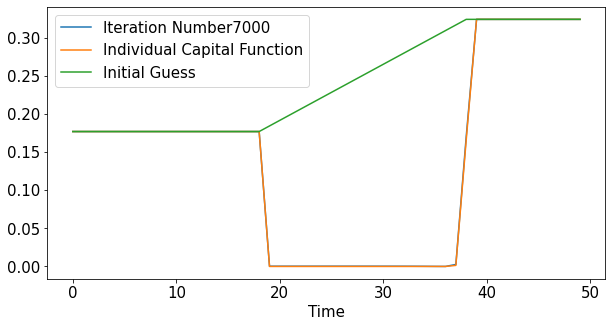

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


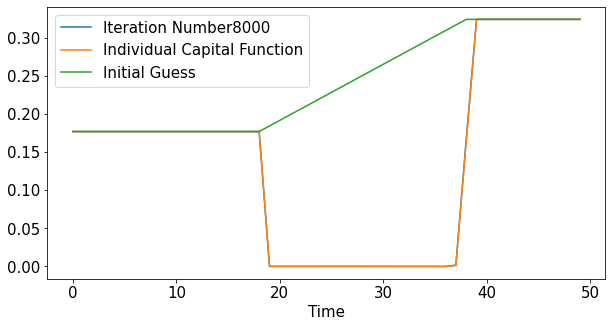

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


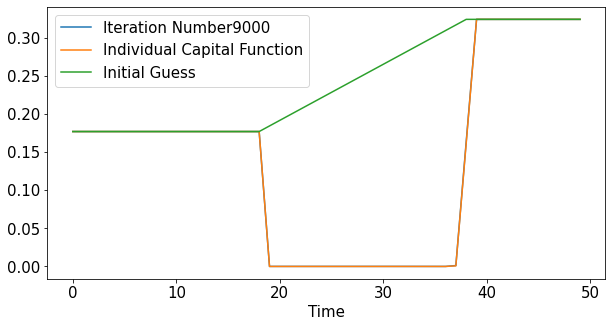

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


In [38]:
'''
Rule 2

a = 1*Λ1(time) - 0*g(time)
b = 0.999*Λ1(time) + 0.001*g(time)

y = np.abs(g(time) - Λ1(time)) >= 1
z = np.abs(g(time) - Λ1(time)) < 1

c = 1*y*a + 1*z*b

'''
# Initial Guess for K sequence

dK = (K_ss(A = 1.5) - K_ss(A = 1)) / 20
K_s = np.zeros(t_max)

for i in range(t_max):
    if i < 19:
        K_s[i] = float(K_ss(A = 1))
        
    if i == 19:
        K0 = K_ss(A=1) + dK
        K_s[i] = float(K0)
        
    if 19 < i < 39 :
        K1 = K0 + dK
        K_s[i] = float(K1)
        K0 = K1
        
    if i >= 39 :
        K_s[i] = float(K_ss(A = 1.5))
        
Λ = interp1d(time, K_s)

count = 0
max_iter = 10000
tol = 1e-06

Λ1 = Λ

while count < max_iter:
    
    # Aggregate Capital Sequence
    K_s = Λ1(time) 
    K_s = K_s.clip(min = 0)
    
    # Capital Rental Price Sequence
    r_s = np.zeros(t_max)
    
    for i in range(t_max):
        r_s[i] = r(K_s[i])
    
    # Individual's capital sequence
    k_s = np.zeros(t_max)
    k_s[39:] = K_ss(A = 1.5)
    k_s[:19] = K_ss(A = 1)
    for i in range(20):
        k_s[38-i] = (1 / β) * (1 / r_s[38-i]) * ((1 + β) * k_s[38-i+1] - (1 / r_s[38-i+1]) * k_s[38-i+2])
    
    g = interp1d(time, k_s)
    
    a = 1 * Λ1(time) - 0 * g(time)
    b = 0.999 * Λ1(time) + 0.001 * g(time)
    y = np.abs(g(time) - Λ1(time)) >= 1
    z = np.abs(g(time) - Λ1(time)) < 1
    c = 1*y*a + 1*z*b
    
    Λ2 = interp1d(time, c)
    
    if int(count) % 1000 == 0:
        plt.figure(figsize = (10,5) )
        plt.plot(Λ2(time), label = 'Iteration Number' + str(count))
        plt.plot(g(time), label = 'Individual Capital Function')
        plt.plot(Λ(time), label = "Initial Guess")
        plt.legend(fontsize = 15)
        plt.xlabel('Time', fontsize = 15)
        plt.tick_params(axis='both', which='major', labelsize=15)
        plt.show()
    
    Λ1 = Λ2
    count += 1

In [30]:
'''
Rule 3

Trial and Error

'''

# Initial Guess for K sequence

dK = (K_ss(A = 1.5) - K_ss(A = 1)) / 20
K_s = np.zeros(t_max)

for i in range(t_max):
    if i < 19:
        K_s[i] = float(K_ss(A = 1))
        
    if i == 19:
        K0 = K_ss(A=1) + dK
        K_s[i] = float(K0)
        
    if 19 < i < 39 :
        K1 = K0 + dK
        K_s[i] = float(K1)
        K0 = K1
        
    if i >= 39 :
        K_s[i] = float(K_ss(A = 1.5))
        
Λ = interp1d(time, K_s)

count = 0
max_iter = 10000
tol = 1e-06

/var/folders/6r/0n3782p533ngcdj_ghsbn7c40000gn/T/ipykernel_1279/3861719252.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  return A * α * (K ** (α-1))


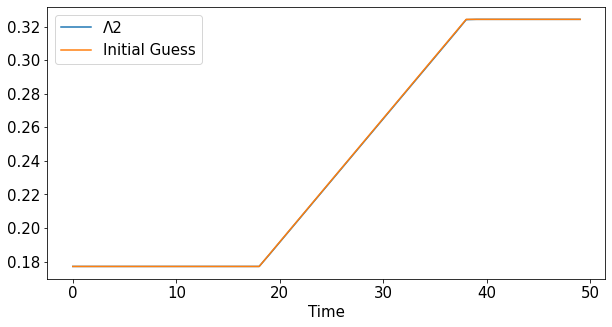

In [35]:
# Aggregate Capital Sequence
K_s = Λ1(time) 
K_s = K_s.clip(min = 0)
    
# Capital Rental Price Sequence
r_s = np.zeros(t_max)
    
for i in range(t_max):
      r_s[i] = r(K_s[i])
    
# Individual's capital sequence
k_s = np.zeros(t_max)
k_s[39:] = K_ss(A = 1.5)
k_s[:19] = K_ss(A = 1)
for i in range(20):
    k_s[38-i] = (1 / β) * (1 / r_s[38-i]) * ((1 + β) * k_s[38-i+1] - (1 / r_s[38-i+1]) * k_s[38-i+2])
    
g = interp1d(time, k_s)
    
a = 0.999 * Λ(time) + 0.001 * g(time)

    
Λ2 = interp1d(time, a)
    
plt.figure(figsize = (10,5) )
plt.plot(Λ2(time), label = 'Λ2')
plt.plot(Λ(time), label = "Initial Guess")
plt.legend(fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

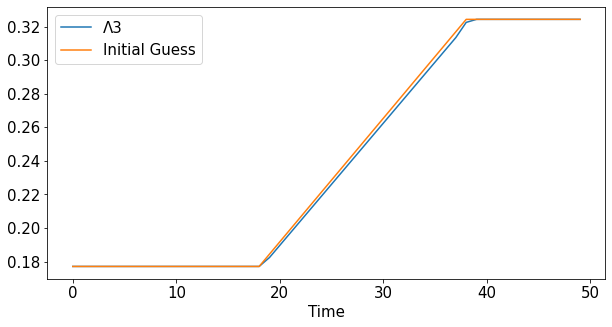

In [37]:
a = 0.99 * Λ2(time) + 0.01 * g(time)

    
Λ3 = interp1d(time, a)
    
plt.figure(figsize = (10,5) )
plt.plot(Λ3(time), label = 'Λ3')
#plt.plot(g(time), label = 'Individual Capital Function')
plt.plot(Λ(time), label = "Initial Guess")
plt.legend(fontsize = 15)
plt.xlabel('Time', fontsize = 15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()